In [3]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

In [567]:
channel = "d0star"
date = "NOV15"

mesonCat = ""
mesonNum = 0
if (channel == "omega"):
    mesonCat = "OmegaCat"
    mesonNum = 1038
elif (channel == "phi"):
    mesonCat = "Phi3Cat"
    mesonNum = 1039
elif (channel == "d0starrho"):
    mesonCat = "D0StarRhoCat"
    mesonNum = 1040
elif (channel == "d0star"):
    mesonCat = "D0StarCat"
    mesonNum = 1041
else:
    raise Exception("Wrong channel.")

chainSGN = ROOT.TChain("events")
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, mesonNum, mesonCat))
dfSGN = ROOT.RDataFrame(chainSGN)
dfSGN = (dfSGN.Define("scale", "w*lumiIntegrated"))


chainBKG = ROOT.TChain("events")
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_{1}_2018.root".format(date, mesonCat))
dfBKG = ROOT.RDataFrame(chainBKG)
dfBKG = (dfBKG.Define("scale", "w*lumiIntegrated"))

In [624]:
omegaVars = [("goodMeson_iso", 0.79, 1.01, 0.001), ("goodMeson_mass", 0.0, 2.00, 0.001), ("goodMeson_ditrk_mass", 0.0, 1.0, 0.001), ("goodMeson_ditrk_pt", 0.0, 200.0, 0.1),
             ("goodMeson_leadtrk_pt", 0.0, 100.0, 0.1), ("goodMeson_subleadtrk_pt", 0.0, 50.0, 0.1),
             ("delta_phi_goodMeson_ditrk_goodPhoton", 0.0, 6.0, 0.01), ("delta_eta_goodMeson_ditrk_goodPhoton", -5.0, 5.0, 0.001)]
phiVars = [("goodMeson_iso", 0.79, 1.01, 0.001), ("goodMeson_mass", 0.0, 2.20, 0.001), ("goodMeson_ditrk_mass", 0.0, 1.5, 0.01), ("goodMeson_ditrk_pt", 0.0, 200.0, 0.1),
             ("goodMeson_leadtrk_pt", 0.0, 100.0, 0.1), ("goodMeson_subleadtrk_pt", 0.0, 50.0, 0.1),
             ("delta_phi_goodMeson_ditrk_goodPhoton", 0.0, 6.0, 0.01), ("delta_eta_goodMeson_ditrk_goodPhoton", -5.0, 5.0, 0.001)]
d0starVars = [("goodMeson_iso", 0.79, 1.01, 0.001), ("goodMeson_mass", 0.0, 3.00, 0.001), ("goodMeson_ditrk_mass", 1.7, 2.3, 0.001), ("goodMeson_ditrk_pt", 0.0, 200.0, 0.1),
             ("goodMeson_leadtrk_pt", 0.0, 100.0, 0.1), ("goodMeson_subleadtrk_pt", 0.0, 50.0, 0.1),
             ("delta_phi_goodMeson_ditrk_goodPhoton", 0.0, 6.0, 0.01), ("delta_eta_goodMeson_ditrk_goodPhoton", -5.0, 5.0, 0.001)]
d0starrhoVars = [("goodMeson_iso", 0.79, 1.01, 0.001), ("goodMeson_mass", 0.0, 3.00, 0.001), ("goodMeson_ditrk_mass", 0.0, 3.0, 0.01), ("goodMeson_ditrk_pt", 0.0, 200.0, 0.1),
             ("goodMeson_leadtrk_pt", 0.0, 100.0, 0.1), ("goodMeson_subleadtrk_pt", 0.0, 50.0, 0.1),
             ("delta_phi_goodMeson_ditrk_goodPhoton", 0.0, 6.0, 0.01), ("delta_eta_goodMeson_ditrk_goodPhoton", -5.0, 5.0, 0.01)]

vars = {"omega": omegaVars, "phi": phiVars, "d0star": d0starVars, "d0starrho": d0starrhoVars}

In [651]:
#0-7
item = 7

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


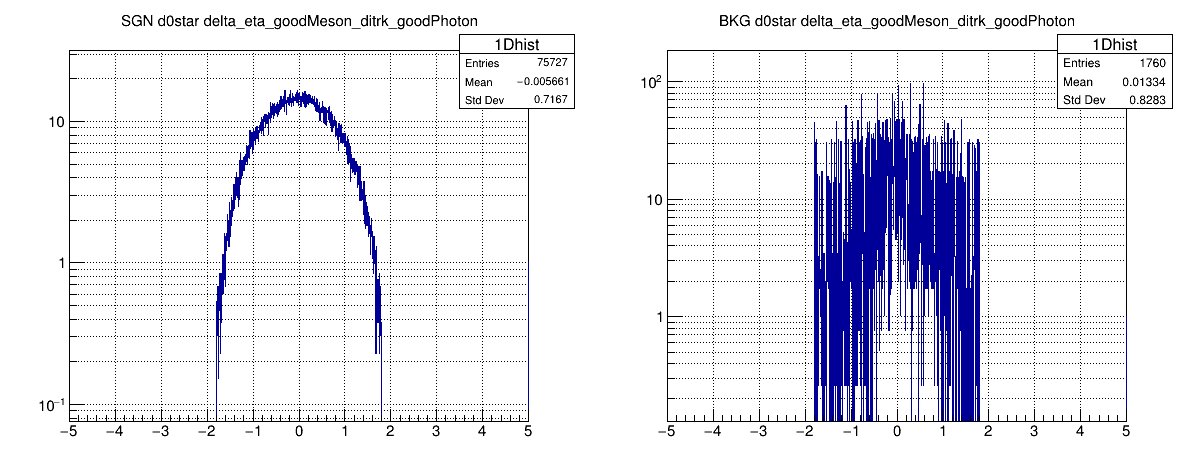

In [652]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 500)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 2000, vars[channel][item][1], vars[channel][item][2]
step = vars[channel][item][3]
p = canvas.cd(1)
h1 = dfSGN.Histo1D(("1Dhist", "SGN " + channel + " " + vars[channel][item][0], nbins, xlow, xhigh), vars[channel][item][0], "scale").GetValue()
h1.Draw("hist")
p.SetGrid()
p.SetLogy()

p = canvas.cd(2)

h2 = dfBKG.Histo1D(("1Dhist", "BKG " + channel + " " + vars[channel][item][0], nbins, xlow, xhigh), vars[channel][item][0], "scale").GetValue()
h2.Draw("hist")
p.SetGrid()
p.SetLogy()

#print(h1.Integral())
#print(h2.Integral())

canvas.Draw()



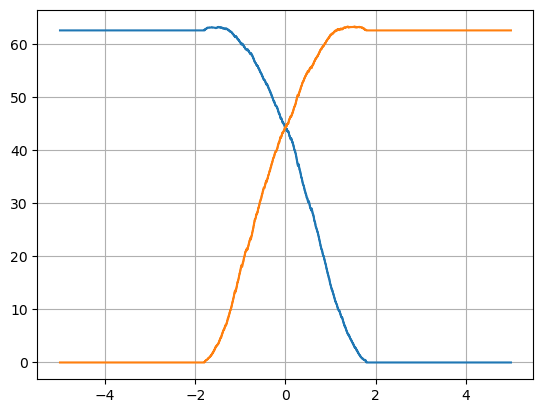

-1.4899999999988278 63.242902067440234
1.5350000000021824 63.327648143680825


In [653]:
#for xlow in range

#.Integral(h1.FindBin(xlow), h1.FindBin(xhigh))
vals = np.arange(xlow, xhigh+step, step)
significances = []
significances_up = []
for v in vals:
    s = h1.Integral(h1.FindBin(v), h1.FindBin(xhigh))
    b = h2.Integral(h2.FindBin(v), h2.FindBin(xhigh))
    #print(v, s)
    #print(v, b)
    significances.append(0 if b == 0 else s/np.sqrt(b))
    #print(v, significances[-1])

    s = h1.Integral(h1.FindBin(xlow), h1.FindBin(v))
    b = h2.Integral(h2.FindBin(xlow), h2.FindBin(v))
    significances_up.append(0 if b == 0 else s/np.sqrt(b))

plt.plot(vals, significances)
plt.plot(vals, significances_up)
plt.grid()
plt.show()

print(vals[significances.index(max(significances))], max(significances))
print(vals[significances_up.index(max(significances_up))], max(significances_up))

In [628]:
#lB, hB = 1.82, 1.91
#lB, hB = 0.7, 5.58
lB, hB = -1.8, 1.8
dfSGN = dfSGN.Filter("{var}[0] > {lowBound} && {var}[0] < {highBound}".format(var=vars[channel][item][0], lowBound=lB, highBound=hB))
dfBKG = dfBKG.Filter("{var}[0] > {lowBound} && {var}[0] < {highBound}".format(var=vars[channel][item][0], lowBound=lB, highBound=hB))
h1 = dfSGN.Histo1D(("1Dhist", "SGN " + channel + " " + vars[channel][item][0], nbins, xlow, xhigh), vars[channel][item][0], "scale").GetValue()
h2 = dfBKG.Histo1D(("1Dhist", "BKG " + channel + " " + vars[channel][item][0], nbins, xlow, xhigh), vars[channel][item][0], "scale").GetValue()

lower = (h1.GetXaxis().GetBinCenter(h1.FindFirstBinAbove(0)-1) + h1.GetXaxis().GetBinCenter(h1.FindFirstBinAbove(0)))/2
higher = (h1.GetXaxis().GetBinCenter(h1.FindLastBinAbove(0)+1) + h1.GetXaxis().GetBinCenter(h1.FindLastBinAbove(0)))/2

print(lower, higher)
s = h1.Integral()
b = h2.Integral()
print(s/np.sqrt(b))

1.8199999999999998 1.9100000000000001
62.58752684337512


In [647]:
#print all final performed cuts
print(channel)
for e in vars[channel]:
    nbins, xlow, xhigh = 2000, e[1], e[2]
    h1 = dfSGN.Histo1D(("1Dhist", "SGN " + channel + " " + e[0], nbins, xlow, xhigh), e[0], "scale").GetValue()
    lower = (h1.GetXaxis().GetBinCenter(h1.FindFirstBinAbove(0)-1) + h1.GetXaxis().GetBinCenter(h1.FindFirstBinAbove(0)))/2
    higher = (h1.GetXaxis().GetBinCenter(h1.FindLastBinAbove(0)+1) + h1.GetXaxis().GetBinCenter(h1.FindLastBinAbove(0)))/2
    print("{:40s} {:3.3f} - {:3.3f}".format(e[0], lower, higher))

d0star
goodMeson_iso                            0.950 - 1.000
goodMeson_mass                           1.820 - 2.401
goodMeson_ditrk_mass                     1.820 - 1.910
goodMeson_ditrk_pt                       45.000 - 200.000
goodMeson_leadtrk_pt                     19.550 - 99.950
goodMeson_subleadtrk_pt                  10.000 - 49.975
delta_phi_goodMeson_ditrk_goodPhoton     0.699 - 5.580
delta_eta_goodMeson_ditrk_goodPhoton     -1.800 - 1.800
